## Dataset and Problem Introduction

In this analysis, we explore social media text classification by classifying tweets from Donald Trump and Justin Trudeau.

The notebook begins by importing all the tools we need from scikit-learn including:
* Tools to vectorize our data - CountVectorizer and TfidfVectorizer.
* Machine learning models - MultinomialNB from the naive_bayes module, LinearSVC from the svm module, and PassiveAggressiveClassifier from the linear_model module.
* Evaluation and optimisation tools - sklearn.metrics and train_test_split and GridSearchCV from the model_selection module.

Data Source: https://www.kaggle.com/unofficialmerve/tweets-of-trump-and-trudeau
<br>Reference: https://www.datacamp.com/

In [18]:
# Set seed for reproducibility
import random; random.seed(68)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

## Transforming data
<p>We begin with a list of tweets that were collected in November 2017. We use a Pandas DataFrame to import the data and pass it to scikit-learn for further processing.</p>

<p>Since the data has been collected via the Twitter API and not split into test and training sets, we use <code>train_test_split()</code> with <code>random_state=68</code> and a test size of 0.33 to split the data. This will ensure we have enough test data and we'll get the same results no matter where or when we run this code.</p>

In [20]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('datasets/tweets.csv')

# Create target
y = tweet_df.author

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.33, 
                 random_state=68)

## Vectorizing the tweets
<p>Now we need to create vectorized representations of the tweets in order to apply machine learning.</p>
<p>To do so, we utilize the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> classes which we first need to fit to the data.</p>
<p>Once this is complete, we can start modelling with the new vectorized tweets</p>

In [21]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Training a multinomial naive Bayes model
Now that we have the data in vectorized form, we can train the first model.
    
To assess the accuracies, we print the test sets accuracy scores for both models.

In [22]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.8181818181818182
NaiveBayes Count Score:  0.7954545454545454


## Evaluating the models with a confusion matrix

<p>For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class.</p>

Confusion matrix, without normalization
Confusion matrix, without normalization


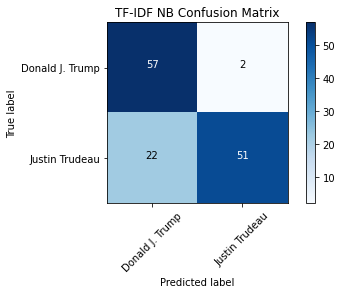

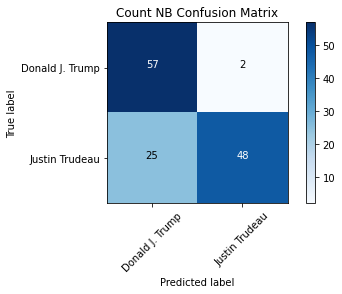

In [23]:
%matplotlib inline
from datasets.helper_functions import plot_confusion_matrix


tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="Count NB Confusion Matrix", figure=1)

#plt.tight_layout()
#plt.show()

## Training a Linear SVC model

LinearSVC Score:   0.864
Confusion matrix, without normalization


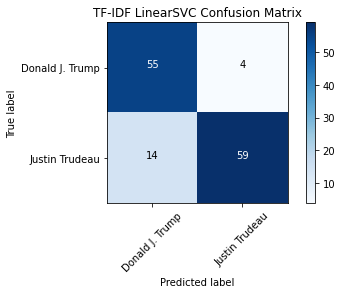

In [24]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

## Examining the top model
<p>The LinearSVC model performed better than the Multinomial Bayesian one. Via the confusion matrix we can see that, although there is still some confusion where Trudeau's tweets are classified as Trump's, the False Positive rate is better than the previous model. </p>

<p>Now let's see what the model has learned. Using the LinearSVC Classifier with two classes (Trump and Trudeau), we can sort the features (tokens) by their weight and see the most important tokens for both Trump and Trudeau. </p>

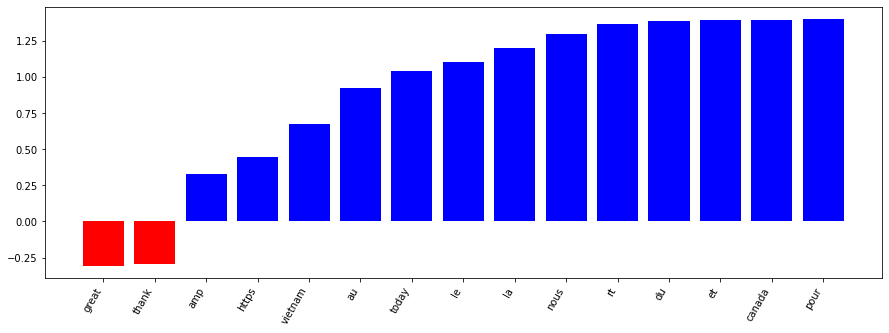

[(-0.3081625322048655, 'great'),
 (-0.2940587178671393, 'thank'),
 (0.3299016528915866, 'amp'),
 (0.44782330653003977, 'https'),
 (0.6706766903980265, 'vietnam'),
 (0.9200888856582344, 'au'),
 (1.0380248464841004, 'today'),
 (1.1054559172550662, 'le'),
 (1.2021631118723868, 'la'),
 (1.2969206245529983, 'nous'),
 (1.3652972666124843, 'rt'),
 (1.3887620101900935, 'du'),
 (1.3889158192650497, 'et'),
 (1.3944089091965153, 'canada'),
 (1.3994817155666057, 'pour')]


In [25]:
from datasets.helper_functions import plot_and_return_top_features

from pprint import pprint
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)
pprint(top_features)

<p>We can see that our model has learnt that Trudeau tweets in French.</p>

## Writing a Trump or Trudeau tweet

<p>Using the printed list and plot above to make some inferences about what words will classify text as Trump or Trudeau, we can fool the model into thinking we are one of the two.</p>

In [26]:
trump_tweet = "America is great!"
trudeau_tweet = "Canada les"

trump_tweet_vectorized = tfidf_vectorizer.transform([trump_tweet])
trudeau_tweet_vectorized = tfidf_vectorizer.transform([trudeau_tweet])

trump_tweet_pred = tfidf_svc.predict(trump_tweet_vectorized)
trudeau_tweet_pred = tfidf_svc.predict(trudeau_tweet_vectorized)

print("Predicted Trump tweet", trump_tweet_pred)
print("Predicted Trudeau tweet", trudeau_tweet_pred)

Predicted Trump tweet ['Donald J. Trump']
Predicted Trudeau tweet ['Justin Trudeau']
